In [1]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
train_dir="./train"
test_dir = './test'
rows=cols=224

In [3]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 rotation_range=40,
                                 width_shift_range=0.1,
                                 height_shift_range=0.1)
                                 
test_datagen = ImageDataGenerator(rescale=1/255)

train_generator=train_datagen.flow_from_directory(train_dir,
                                                  target_size=(rows,cols),
                                                  batch_size=32,
                                                  class_mode='categorical')

test_generator=test_datagen.flow_from_directory(test_dir,
                                                target_size=(rows,cols),
                                                batch_size=32,
                                                class_mode='categorical')

Found 14084 images belonging to 106 classes.
Found 3463 images belonging to 106 classes.


In [3]:
trained_model=Xception(input_shape=(rows,cols,3),           
                    include_top=False,
                    weights='imagenet')   


trained_model.trainable=True  
trained_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [4]:
#last_layer=trained_model.get_layer('out_relu')   
last_layer = trained_model.get_layer('block14_sepconv2_act')
last_layer_output=last_layer.output

In [5]:
x = tf.keras.layers.GlobalAveragePooling2D()(last_layer_output)

x = tf.keras.layers.Dropout(0.8)(x)                      

x = tf.keras.layers.Dense(106,activation='softmax')(x)

model = tf.keras.Model(trained_model.input,x) 
    
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

#model.summary()

In [7]:
model.fit(train_generator,validation_data=test_generator,epochs=20)

Epoch 1/20
441/441 [==============================] - 272s 597ms/step - loss: 4.5088 - accuracy: 0.0267 - val_loss: 3.9840 - val_accuracy: 0.1109
Epoch 2/20
441/441 [==============================] - 261s 592ms/step - loss: 3.3929 - accuracy: 0.1847 - val_loss: 2.3630 - val_accuracy: 0.4360
Epoch 3/20
441/441 [==============================] - 263s 595ms/step - loss: 2.2956 - accuracy: 0.4152 - val_loss: 1.5893 - val_accuracy: 0.5879
Epoch 4/20
441/441 [==============================] - 263s 596ms/step - loss: 1.5528 - accuracy: 0.6000 - val_loss: 1.0129 - val_accuracy: 0.7502
Epoch 5/20
441/441 [==============================] - 262s 594ms/step - loss: 1.0647 - accuracy: 0.7287 - val_loss: 0.7878 - val_accuracy: 0.7918
Epoch 6/20
441/441 [==============================] - 263s 597ms/step - loss: 0.7487 - accuracy: 0.8128 - val_loss: 0.6192 - val_accuracy: 0.8322
Epoch 7/20
441/441 [==============================] - 264s 597ms/step - loss: 0.5373 - accuracy: 0.8621 - val_loss: 0.5175 -

In [6]:
model.load_weights('pretrained_epoch20.h5')

In [7]:
dir_list = os.listdir(os.path.join('./test'))
labels=[]
for i in dir_list:
    labels.append(i)
labels=sorted(labels)

In [8]:
# train_datagen = ImageDataGenerator(rescale=1/255)

# test=train_datagen.flow_from_directory('./test_end/',
#                                                   target_size=(rows,cols),
#                                                    batch_size=10,
#                                                   class_mode='categorical')
def prepare_img(path):
    img = image.load_img(path, target_size=(224,224))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)

In [9]:
dir_list = os.listdir(os.path.join('./test_end/test1'))
inputs=[]
paths=[]
for i in dir_list:
    paths.append('./test_end/test1/'+i)
    inputs.append(prepare_img('./test_end/test1/'+i))

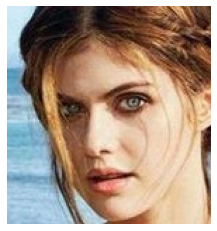

Alexandra_Daddario


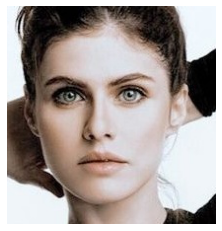

Alexandra_Daddario


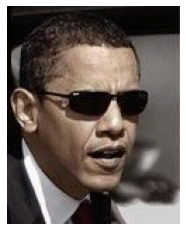

Barack_obama


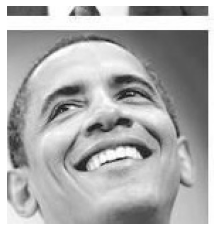

Barack_obama


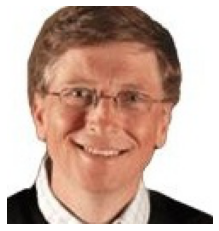

Bill_Gates


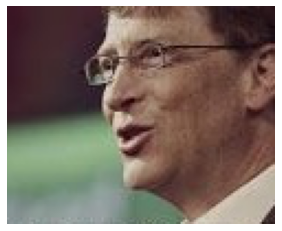

Bill_Gates


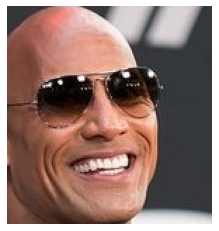

Dwayne_johnson


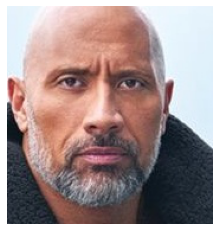

Dwayne_johnson


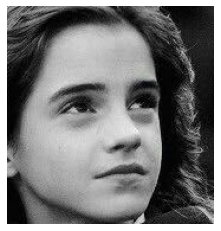

Emma_watson


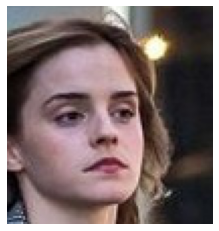

Emma_watson


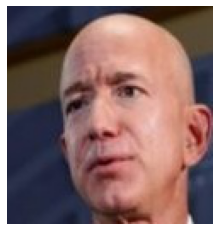

Jeff_bezos


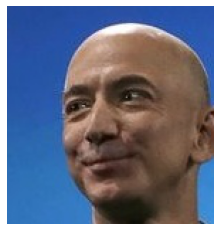

Jeff_bezos


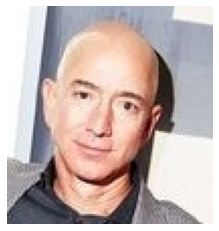

Jeff_bezos


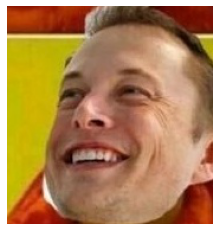

Elon_musk


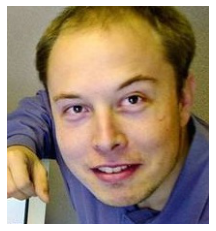

Elon_musk


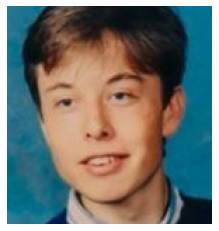

Elon_musk


In [10]:
for i in range(len(inputs)):
    x=model.predict([inputs[i]])
    image = mpimg.imread(paths[i])
    plt.axis("off")
    plt.imshow(image)
    plt.show()
    m=np.argmax(x)
    print(labels[m])